### Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


So this dataset designed to understand the factors that lead a person will work for the company , by model(s) that uses the current credentials/demographics/experience to predict the probability of a candidate to look for a new job or will work for the company.


The whole data divided to train and test . Target isn't included in test but the target values is in hands for related tasks. I provided a sample submission corresponds to enrolleeid of test set too ( enrolleid - target)

#### Also:

The dataset is imbalanced
Most features are categorical, some with high cardinality

## My Task:
- Predict the probability of a candidate will work for the company
- Interpret models such a way that illustrate which features affects candidate decision


- This is a Supervised Classification Task

## Read Data from Files

In [1]:
# For Dataframing
import pandas as pd
# For Numbering
import numpy as np

In [2]:
test = pd.read_csv('data/aug_test.csv')
train = pd.read_csv('data/aug_train.csv')

In [3]:
print('Test Shape')
print(test.shape)

Test Shape
(2129, 13)


In [4]:
print('Train Shape')
print(train.shape)
train.head()

Train Shape
(19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
# Examine Target
train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [7]:
# Percent Positive
print("Percent Positive Targets:")
percent_pos = train['target'].value_counts()[1]/len(train['target'])
percent_pos

Percent Positive Targets:


0.24934753105752167

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Dealing with Nans

In [9]:
# Label Nans in Categorical Variables
def fill_categorical_nans(df):
    cat_columns = df.describe(exclude='number').columns
    for col in cat_columns:
        df[col] = df[col].fillna(str(col) + '_nan')
    
    return df

train = fill_categorical_nans(train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
numerical_cols = train.select_dtypes([np.number]).columns
train[numerical_cols] = imputer.fit_transform(train[numerical_cols])

assert train.isna().sum().sum() == 0, 'There are Nans in Data Frame.'

## Examining Feature Distributions

In [10]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


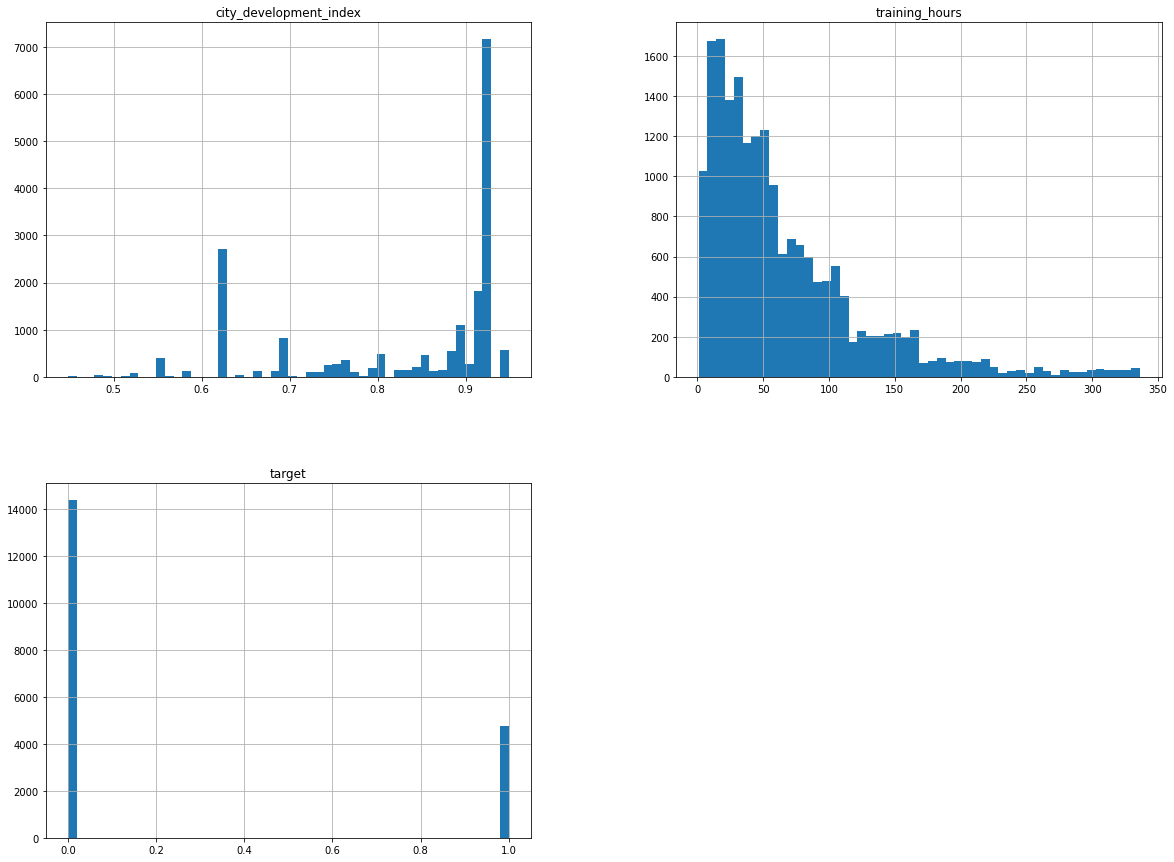

In [11]:
# Plot Numerical Variables
%matplotlib inline
import matplotlib.pyplot as plt
train.drop('enrollee_id', axis=1).hist(bins=50, figsize=(20, 15))
plt.show()

### Examining Cardinality of Non-Numeric Columns

In [12]:
train.describe(exclude='number')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158
unique,123,4,2,4,6,7,23,9,7,7
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,company_size_nan,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,5938,9817,8040


In [13]:
import helpers.cardinality as crd
crd.cardinality_report(train)

-------------
COLUMN: relevent_experience
nUnique: 2
--- TOP 5 ---
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


-------------
COLUMN: gender
nUnique: 4
--- TOP 5 ---
Male          13221
gender_nan     4508
Female         1238
Other           191
Name: gender, dtype: int64


-------------
COLUMN: enrolled_university
nUnique: 4
--- TOP 5 ---
no_enrollment              13817
Full time course            3757
Part time course            1198
enrolled_university_nan      386
Name: enrolled_university, dtype: int64


-------------
COLUMN: education_level
nUnique: 6
--- TOP 5 ---
Graduate               11598
Masters                 4361
High School             2017
education_level_nan      460
Phd                      414
Name: education_level, dtype: int64


-------------
COLUMN: major_discipline
nUnique: 7
--- TOP 5 ---
STEM                    14492
major_discipline_nan     2813
Humanities                669
Other                

In [14]:
# Categorical Variables Ranked from Low to High Cardinality
ranked = crd.rank_cardinality(train)
low_crd = ranked[:-1]
low_crd

['relevent_experience',
 'gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type',
 'last_new_job',
 'company_size',
 'experience']

In [15]:
# Drop Enrollee ID, City -> Cardinality too high
# T- Try to see if model performance improves when including city. -T
# -- Cities were showing up in the val set that weren't in the train set...
# --- and this messed up the encoding step
# --- T- Maybe try to 'stratify sample' the train set so that it includes all cities? -T
# --- T- Or put least common cities into one category called 'Uncommon_City'? -T
train = train.drop(['enrollee_id', 'city'], axis=1)

In [16]:
len(train.columns)

12

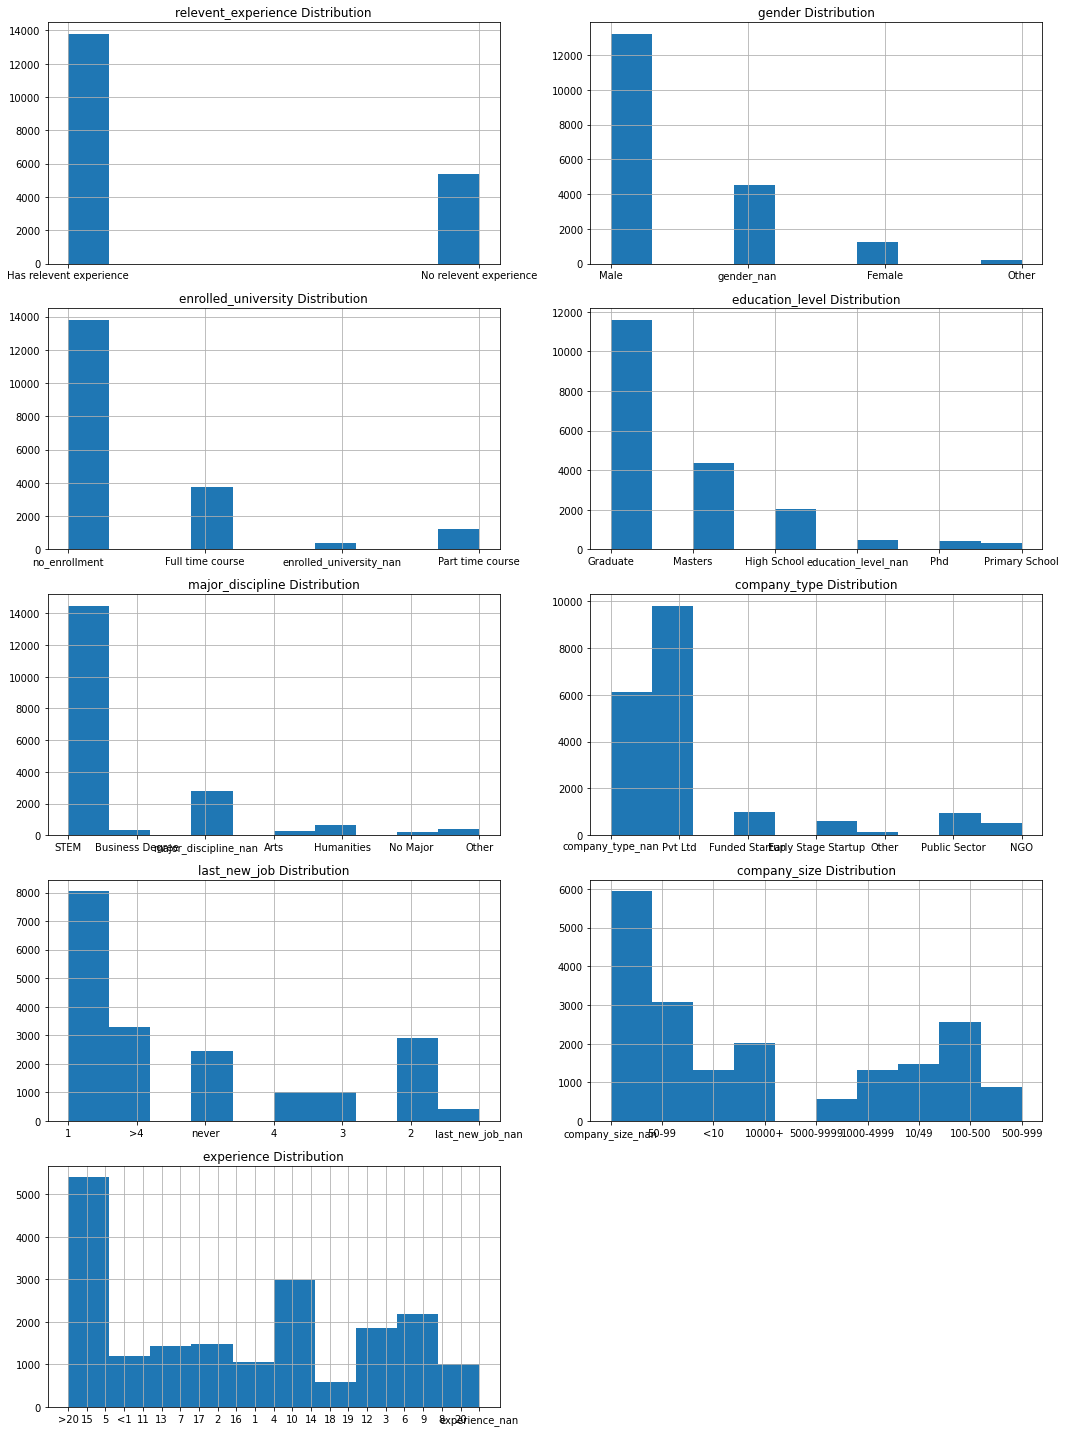

In [17]:
# Plot Categorical Variables
%matplotlib inline
import matplotlib.pyplot as plt
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(train, low_crd, 5, 2)

## Separate Train into Train and Val

In [18]:
# Separate Val and Train
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.5, random_state=42)
print("Train: ", train.shape)
print("Val: ", val.shape)

Train:  (9579, 12)
Val:  (9579, 12)


In [19]:
# Separate X, y
X_train = train.drop('target', axis=1)
y_train = train['target']
X_val = val.drop('target', axis=1)
y_val = val['target']
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(9579, 11) (9579,) (9579, 11) (9579,)


## Baseline Prediction

In [20]:
# Establish Baseline
val['target'].value_counts()

0.0    7147
1.0    2432
Name: target, dtype: int64

In [21]:
# Looks like most respondents don't want to change jobs.
# Baseline predicts all respondents to be non-changers.
base_pred = [0.0] * (val.shape[0] - 1)
base_pred.append(1.0) # Recall is 0 if there are 0 True Pos 
                      # -> So insert 1 to estimate the calculation?
assert len(base_pred) == val.shape[0]

In [22]:
# Base Pred Normal
base_pred = [0.0] * (val.shape[0])

In [23]:
# Baseline Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, base_pred)

0.7461112851028291

### Playing Around with Confusion Matrix Metrics

In [24]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(val['target'], base_pred)
cf

array([[7147,    0],
       [2432,    0]])

In [25]:
# I choose to base prediction correctness on recall as opposed to precision because..
# Assumption: False Negatives are More Costly than False Positives
# ie. A potential job-changer that is missed by the system is more costly
#     than a non-job-changer contacted.
from sklearn.metrics import recall_score
recall_score(val['target'], base_pred)

0.0

In [26]:
TN = cf[0][0] # 2313 -> Correct Negs
FP = cf[0][1] # 0 -> Incorrect Pos
FN = cf[1][0] # 753 -> Incorrect Negs
TP = cf[1][1] # 0 -> 0 Correct Pos

In [27]:
# Precision on Neg?
# Of all Negative Guesses 75% of them were correct.
TN / (TN + FN)

0.7461112851028291

In [28]:
# This is Recall on Neg?
# This means of all of our Actual Negs we Predicted All of them
# Not 1 neg was left behind... this might not be the best performance metric for us
TN / (TN + FP)

1.0

In [29]:
# Precision Traditional
# TP / (TP + FP) -> No Precision Since there were 0 Pos Guesses

In [30]:
# Traditional Recall
TP / (TP + FN)

0.0

## **Build Predictor Pipeline**

In [31]:
assert X_val.columns.all() == X_train.columns.all()

In [34]:
# Transformation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# T- See if Specifying the Order for Each Col Improves Performance. -T
enc = OrdinalEncoder()
std_scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000)

pipe = Pipeline(steps=[
    ('enc', enc), 
    ('std_scaler', std_scaler),
    ('logistic', logistic)
]
)
model = pipe.fit(X_train, y_train)

In [35]:
pred = model.predict(X_val)
recall_score(val['target'], pred)

0.2611019736842105

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val['target'], pred)

array([[6651,  496],
       [1797,  635]])

In [38]:
cf

array([[7147,    0],
       [2432,    0]])

In [40]:
# Tree based model works better than linear regression.
from sklearn.ensemble import RandomForestClassifier

enc = OrdinalEncoder()
std_scaler = StandardScaler()
rf = RandomForestClassifier()

pipe = Pipeline(steps=[
    ('enc', enc), 
    ('std_scaler', std_scaler),
    ('rf', rf)
]
)
model = pipe.fit(X_train, y_train)

In [41]:
pred = model.predict(X_val)
recall_score(val['target'], pred)

0.4510690789473684

In [42]:
model.score(X_val, y_val)

0.7751331036642656

In [ ]:
# model = pipe.fit(X_train, y_train)
# pipe.score(X_val, y_val)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state=42).fit(X_train, y_train)
# pred = clf.predict(X_val)
# recall = recall_score(y_val, pred)

In [ ]:
# recall